In [1]:
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem.Draw import IPythonConsole
from rdkit import DataStructs
import rdkit
print(rdkit.__version__)

2021.09.4


In [3]:
import os 

ms = []
names = []

for dir in os.listdir('./data'):
    if os.path.isdir('./data/'+dir):
        for file in os.listdir('./data/'+dir):
            if file.endswith('.pdb'):
                names.append(dir)
                m = rdkit.Chem.rdmolfiles.MolFromPDBFile('./data/'+dir+"/"+file)
                if m is None:
                    print("Error reading file:", file)
                else:
                    ms.append(m)
                    #print(type(m))


Error reading file: struc.pdb


RDKit ERROR: [18:22:43] Explicit valence for atom # 0 Cl, 2, is greater than permitted
[18:22:43] Explicit valence for atom # 0 Cl, 2, is greater than permitted
RDKit WARNING: [18:22:43] WARNING: not removing hydrogen atom without neighbors
[18:22:43] WARNING: not removing hydrogen atom without neighbors


In [5]:

from rdkit import DataStructs

print("We have " , len(ms), " molecules ")

fpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=1024)
simfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=4096,countSimulation=True)
fps = [fpgen.GetFingerprint(m) for m in ms]
countfps = [fpgen.GetCountFingerprint(m) for m in ms]
simfps = [simfpgen.GetFingerprint(m) for m in ms]

countsims = []
sims = []
simsims = []
for i in range(len(ms)//2):
    for j in range(i+i,len(ms)//2):
        countsims.extend(DataStructs.BulkTanimotoSimilarity(countfps[i],countfps[j:]))
        sims.extend(DataStructs.BulkTanimotoSimilarity(fps[i],fps[j:]))
        simsims.extend(DataStructs.BulkTanimotoSimilarity(simfps[i],simfps[j:]))

We have  151  molecules 


In [6]:
from scipy import stats

bvr,_ = stats.spearmanr(countsims,sims)
simr,_ = stats.spearmanr(countsims,simsims)
print(bvr,simr)


0.9995193308263987 0.9999709338530205


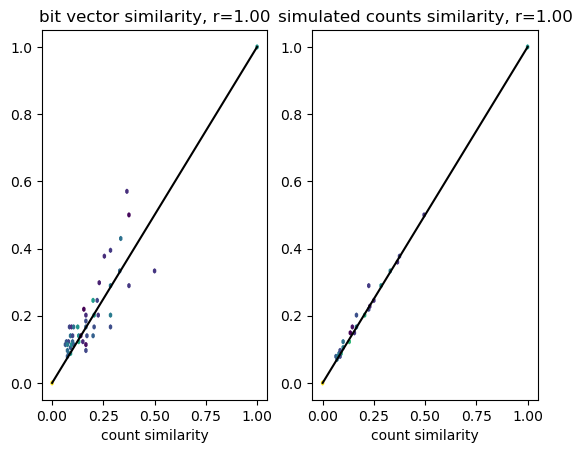

In [9]:

from matplotlib.pyplot import *


subplot(1,2,1)
hexbin(countsims,sims,bins='log')
plot((0,1),(0,1),'k-')
title(f'bit vector similarity, r={bvr:.2f}')
xlabel('count similarity')
subplot(1,2,2)
hexbin(countsims,simsims,bins='log')
plot((0,1),(0,1),'k-')
title(f'simulated counts similarity, r={simr:.2f}')
xlabel('count similarity');


In [14]:
import numpy as np

fpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=1024)

for m in ms:
    np_bits = fpgen.GetFingerprintAsNumPy(m)
    np_counts = fpgen.GetCountFingerprintAsNumPy(m)

    # print non zero value and posizion in the array
    print(np.nonzero(np_bits), np_bits[np.nonzero(np_bits)])
    print(np.nonzero(np_counts), np_counts[np.nonzero(np_counts)])

(array([136, 229]),) [1 1]
(array([136, 229]),) [1 2]
(array([574, 656, 696, 849, 929]),) [1 1 1 1 1]
(array([574, 656, 696, 849, 929]),) [2 1 1 2 1]
(array([309, 386, 695, 807]),) [1 1 1 1]
(array([309, 386, 695, 807]),) [2 1 1 2]
(array([389, 807]),) [1 1]
(array([389, 807]),) [1 2]
(array([260, 291, 360, 674, 790, 807]),) [1 1 1 1 1 1]
(array([260, 291, 360, 674, 790, 807]),) [1 1 1 1 1 1]
(array([414]),) [1]
(array([414]),) [1]
(array([342, 609, 623]),) [1 1 1]
(array([342, 609, 623]),) [1 1 1]
(array([ 342,  573,  609,  650,  674, 1016]),) [1 1 1 1 1 1]
(array([ 342,  573,  609,  650,  674, 1016]),) [1 1 1 1 1 1]
(array([ 53, 623, 650]),) [1 1 1]
(array([ 53, 623, 650]),) [1 1 1]
(array([332, 342, 650]),) [1 1 1]
(array([332, 342, 650]),) [1 1 1]
(array([240]),) [1]
(array([240]),) [1]
(array([296, 425, 635]),) [1 1 1]
(array([296, 425, 635]),) [4 1 4]
(array([431]),) [1]
(array([431]),) [1]
(array([  33,  147, 1010]),) [1 1 1]
(array([  33,  147, 1010]),) [1 1 1]
(array([128, 607